<h1> Classification of images using CNN </h1>

<h4>this project  classifies into following classes by using keras convolutional neural network</h4> <br><ol><li>Aeroplane</li><li>car</li><li>cat</li><li>dog</li><li>flower</li><li>fruit</li><li>motorbike</li><li>person</li></ol><br> 



In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


we have made a folder named natural_images and there 8 folders respectively of different classes 

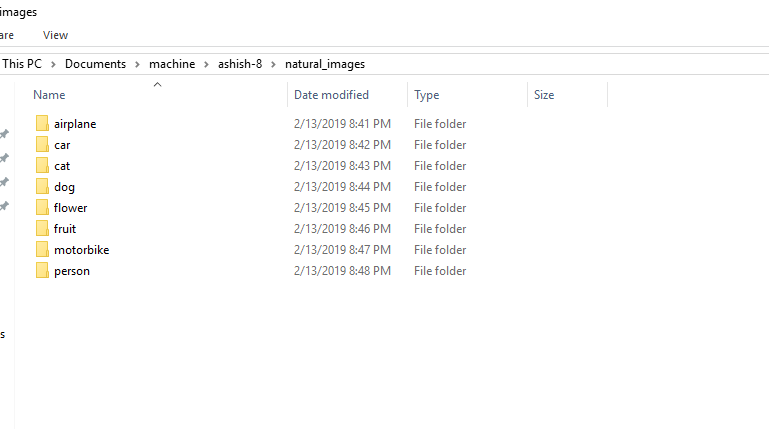

and similarly an another folder test to validate <br>

In [6]:
train_x='natural_images'
train_gen=ImageDataGenerator(rescale=1./255)
trng=train_gen.flow_from_directory(train_x,target_size=(100,100),batch_size=20,class_mode='categorical')



Found 5423 images belonging to 8 classes.


In [7]:
test_x='test'
train_gen=ImageDataGenerator(rescale=1./255)
test=train_gen.flow_from_directory(test_x,target_size=(100,100),batch_size=20,class_mode='categorical')


Found 1476 images belonging to 8 classes.


In [9]:
from keras import layers,models
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop,Adam

from keras.layers.core import Dense,Dropout,Activation,Flatten

from keras.layers.convolutional import Conv2D,MaxPooling2D

In [10]:
models = Sequential()
models.add(Conv2D(32, 3, 3, input_shape=(100, 100,3)))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(32, 3, 3))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, 3, 3))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Flatten())
models.add(Dense(64))
models.add(Activation('relu'))
models.add(Dropout(0.5))
models.add(Dense(8))
models.add(Activation('softmax'))

c:\users\ashish kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,...)`
  
c:\users\ashish kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
c:\users\ashish kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [11]:
models.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
__________

In [12]:
models.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
models.fit_generator(trng,epochs=10,steps_per_epoch=5423,validation_data=test,validation_steps=1476)

Epoch 1/10
5423/5423 [==============================] - 2651s 489ms/step - loss: 0.2764 - acc: 0.8949 - val_loss: 0.2402 - val_acc: 0.9376
Epoch 2/10
5423/5423 [==============================] - 2523s 465ms/step - loss: 0.0684 - acc: 0.9740 - val_loss: 0.3376 - val_acc: 0.9370
Epoch 3/10
5423/5423 [==============================] - 2523s 465ms/step - loss: 0.0410 - acc: 0.9855 - val_loss: 0.3451 - val_acc: 0.9453
Epoch 4/10
5423/5423 [==============================] - 2535s 467ms/step - loss: 0.0341 - acc: 0.9882 - val_loss: 0.4050 - val_acc: 0.9358
Epoch 5/10
5423/5423 [==============================] - 2564s 473ms/step - loss: 0.0271 - acc: 0.9908 - val_loss: 0.4316 - val_acc: 0.9409
Epoch 6/10
5423/5423 [==============================] - 2518s 464ms/step - loss: 0.0271 - acc: 0.9909 - val_loss: 0.4836 - val_acc: 0.9288
Epoch 7/10
5423/5423 [==============================] - 2536s 468ms/step - loss: 0.0237 - acc: 0.9921 - val_loss: 0.4947 - val_acc: 0.9406
Epoch 8/10
5423/5423 [=====

In [16]:
models.save('classify-8_2.h5')

In [15]:
models.evaluate_generator(test,1400)

[0.5257601786742209, 0.9411617172531097]